<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Сравнение-моделей,-обученых-на-разных-выборках" data-toc-modified-id="Сравнение-моделей,-обученых-на-разных-выборках-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сравнение моделей, обученых на разных выборках</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')

## Подготовка данных

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()
#удаляю столбцы, которые не пригодятся для построения модели

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Типы всех колонок корректны. 

In [8]:
df.Tenure.isna().sum()

909

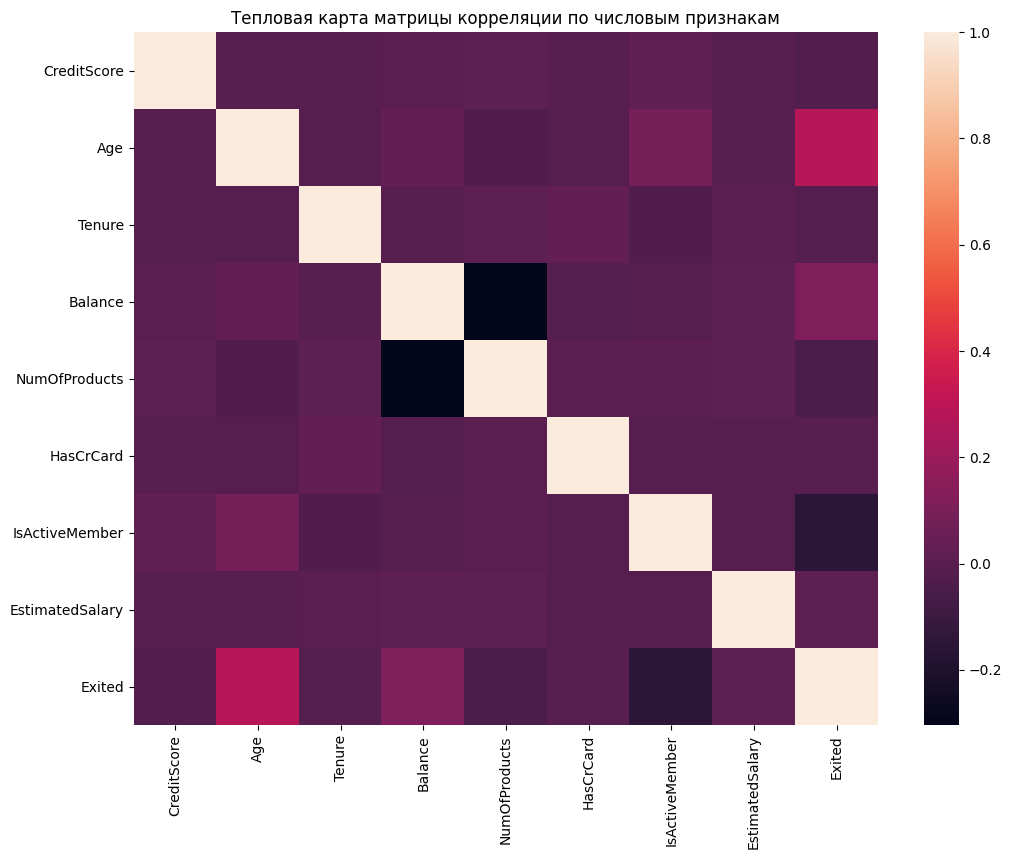

In [9]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr())
plt.title('Тепловая карта матрицы корреляции по числовым признакам')
plt.show()

In [10]:
df.Tenure.value_counts(normalize=True, dropna=False).sort_index()

0.0     0.0382
1.0     0.0952
2.0     0.0950
3.0     0.0928
4.0     0.0885
5.0     0.0927
6.0     0.0881
7.0     0.0925
8.0     0.0933
9.0     0.0882
10.0    0.0446
NaN     0.0909
Name: Tenure, dtype: float64

In [11]:
df[df.Tenure.isna()].Exited.value_counts(normalize=True)

0    0.79868
1    0.20132
Name: Exited, dtype: float64

In [12]:
df.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [13]:
print(f'{df.Tenure.isna().sum() / df.shape[0]:.2%}') 

9.09%


Все колонки полностью заполнены, кроме колонки Tenure (сколько лет человек является клиентом банка), там есть 909 пропусков. В моделях LogisticRegression, DecisionTreeClassifier, RandomForestClassifier не поддерживается обучение по данным с пустыми значениями. Есть следующие пути решения проблемы:

1) заполнить ячейки с помощью других колонок, их комбинацией или с применением методов машинного обучения (например, KNN). Проблема в том, что другие колонки по смыслу очень трудно связать с количеством лет клиенства и корреляция с ними низкая, например, не предоставлена колонка даты подписания договора с клиентом или тому подобное, поэтому такой способ может исказить данные.

2) заполнить пропущеные значения медианой либо средним значением по колонке. Столбец Tenure имеет распределение близкое к равномерному (кроме значений 0 и 10 лет, частота таких значений примерно в два раза меньше чем остальных, скорее всего потому что количество лет определяется по году подписания договора, а данные начали собирать не в начале года, а закончили не в конце). Заполнение медианой либо средним нарушит распределение.

3) удалить столбец Tenure, колонок для обучения не сильно много (всего 10), удаление одной из колонок может значительно ухудшить метрики моделей.

4) удалить строки с пустыми значениями. Распределения таргета по строкам с пустыми значениями и по всему датасету примерно одинаковы, данных достаточно останется достаточно много. Поэтому качество модели не должно значительно пострадать, выберу этот путь решения проблемы.

In [14]:
df.dropna(inplace=True)
df.shape
#удаляю строки с пустыми значениями

(9091, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


In [16]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [17]:
for column in df.select_dtypes(include='object'):
    print(df[column].value_counts(normalize=True))
    print()

France     0.500495
Germany    0.252227
Spain      0.247278
Name: Geography, dtype: float64

Male      0.547135
Female    0.452865
Name: Gender, dtype: float64



значения во всех колонках корректны

In [18]:
columns_object = ['Geography', 'Gender']#сохраняю категориальные колонки в отдельный датасет и их имена
df_object = df[columns_object]
ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(df_object)
#применяю алгоритм One hot encoding для двух категориальных признаков, чтобы данные были пригодны для используемых далее
#алгоритмов машинного обучения

OneHotEncoder(drop='first', sparse=False)

In [19]:
df.drop(columns=columns_object, inplace=True)

In [20]:
df = df.join(pd.DataFrame(data=ohe.transform(df_object), columns=ohe.get_feature_names(columns_object), index=df.index))
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [21]:
X = df.drop(columns=['Exited'])
y = df['Exited']
X.head()
#делю датасет на предсказывающие колонки и таргет

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0.0,0.0,0.0
1,608,41,1.0,83807.86,1,0,1,112542.58,0.0,1.0,0.0
2,502,42,8.0,159660.80,3,1,0,113931.57,0.0,0.0,0.0
3,699,39,1.0,0.00,2,0,0,93826.63,0.0,0.0,0.0
4,850,43,2.0,125510.82,1,1,1,79084.10,0.0,1.0,0.0


In [22]:
y.value_counts(normalize=True)

0    0.796062
1    0.203938
Name: Exited, dtype: float64

In [23]:
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=21)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5, stratify=y_valid_test, random_state=21)
#делю данные на обучающую, валидационную и тестовую выборки с стратификацией по таргету

In [24]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2763,706,47,6.0,120621.89,1,1,1,140803.70,1.0,0.0,0.0
6673,729,36,8.0,109106.80,1,0,0,121311.12,0.0,0.0,0.0
77,678,32,9.0,0.00,1,1,1,148210.64,0.0,0.0,0.0
2650,587,33,5.0,100116.82,1,1,0,34215.58,0.0,0.0,1.0
9890,662,37,4.0,155187.30,1,1,0,48930.80,0.0,1.0,1.0


In [25]:
X_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8014,731,39,2.0,126816.18,1,1,1,74850.93,0.0,1.0,0.0
1607,711,64,4.0,0.00,2,1,1,3185.67,0.0,0.0,1.0
5438,679,34,7.0,160515.37,1,1,0,121904.14,0.0,0.0,1.0
1610,588,24,0.0,0.00,2,1,1,140586.08,0.0,0.0,0.0
4059,676,37,10.0,106242.67,1,1,1,166678.28,0.0,0.0,1.0


In [26]:
 X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4265,709,32,4.0,147307.91,1,0,1,40861.55,0.0,0.0,1.0
1043,579,35,1.0,0.00,2,1,0,4460.20,0.0,0.0,1.0
3447,646,32,8.0,105397.80,1,1,0,78111.84,1.0,0.0,1.0
421,586,38,2.0,0.00,2,1,0,87168.46,0.0,0.0,0.0
858,456,32,9.0,147506.25,1,1,1,135399.21,0.0,1.0,1.0


In [27]:
y_train.value_counts(normalize=True)

0    0.796113
1    0.203887
Name: Exited, dtype: float64

In [28]:
y_valid.value_counts(normalize=True)

0    0.79593
1    0.20407
Name: Exited, dtype: float64

In [29]:
y_test.value_counts(normalize=True)

0    0.796042
1    0.203958
Name: Exited, dtype: float64

In [30]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
#преобразую колонки с числовыми значениями к стандартному виду (m = 0, q = 1)

In [31]:
scaler = StandardScaler()
scaler.fit(X_train[numeric])

StandardScaler()

In [32]:
X_train[numeric] = scaler.transform(X_train[numeric])
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2763,0.565489,0.754729,0.351502,0.710302,-0.909327,1,1,0.701316,1.0,0.0,0.0
6673,0.802436,-0.282690,1.044217,0.525230,-0.909327,0,0,0.363148,0.0,0.0,0.0
77,0.277030,-0.659934,1.390574,-1.228344,-0.909327,1,1,0.829815,0.0,0.0,0.0
2650,-0.660459,-0.565623,0.005144,0.380743,-0.909327,1,0,-1.147833,0.0,0.0,1.0
9890,0.112197,-0.188380,-0.341214,1.265840,-0.909327,1,0,-0.892545,0.0,1.0,1.0


In [33]:
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8014,0.823041,0.000242,-1.033929,0.809857,-0.909327,1,1,-0.442869,0.0,1.0,0.0
1607,0.616999,2.358012,-0.341214,-1.228344,0.814506,1,1,-1.686156,0.0,0.0,1.0
5438,0.287332,-0.471312,0.697859,1.351474,-0.909327,1,0,0.373436,0.0,0.0,1.0
1610,-0.650157,-1.414420,-1.726644,-1.228344,0.814506,1,1,0.697540,0.0,0.0,0.0
4059,0.256426,-0.188380,1.736932,0.479198,-0.909327,1,1,1.150202,0.0,0.0,1.0


In [34]:
X_test[numeric] = scaler.transform(X_test[numeric])
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4265,0.596395,-0.659934,-0.341214,1.139202,-0.909327,0,1,-1.032535,0.0,0.0,1.0
1043,-0.742876,-0.377001,-1.380286,-1.228344,0.814506,1,0,-1.664045,0.0,0.0,1.0
3447,-0.052636,-0.659934,1.044217,0.465619,-0.909327,1,0,-0.386297,1.0,0.0,1.0
421,-0.670761,-0.094069,-1.033929,-1.228344,0.814506,1,0,-0.229177,0.0,0.0,0.0
858,-2.010031,-0.659934,1.390574,1.142390,-0.909327,1,1,0.607556,0.0,1.0,1.0


Вывод:

Из данных удалены ненужные столбцы. 

Проверена корректность типов и значений колонок.

Удалены строки с пустыми значениями.

Датасет разделен на предсказывающие колонки и таргет.

Категориальные признаки преобразованы к числовым с помощью One hot encoding.

Выборка поделена на обучающую, валидационную и тестовую в соотношении 60:20:20 со стратификацией по таргету.

Числовые данные обучающего, валидационного и тестового датасетов стандартизированы с помощью StandartScaler, обученного на обучающей выборке.

Данные готовы для применения машинного обучения.

## Исследование задачи

### Баланс классов

In [35]:
y_train.value_counts(normalize=True)

0    0.796113
1    0.203887
Name: Exited, dtype: float64

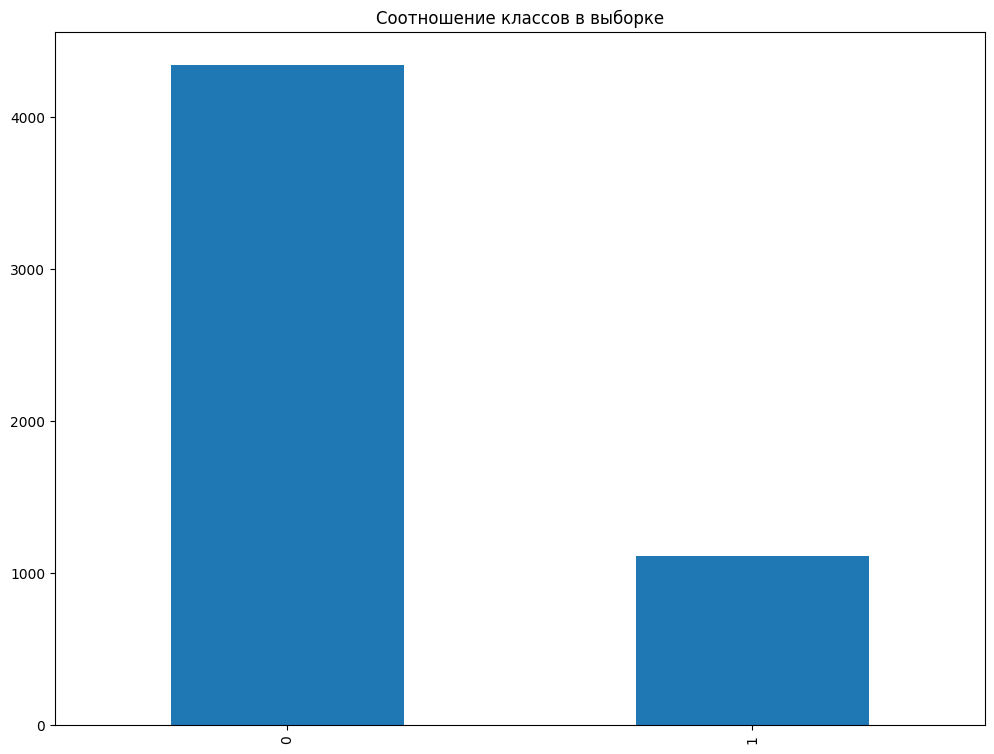

In [36]:
plt.figure(figsize=(12, 9))
y_train.value_counts().plot(kind='bar');
plt.title('Соотношение классов в выборке')
plt.show()

Присутствует явный дисбаланс классов. Ушедших пользователей примерно в 4 раза меньше, чем оставшихся в данной выборке. Сначала исследую метрики моделей обученных на данных без изменений, затем избавлюсь от дисбаланса в данных и снова проведу иследование.

### LogisticRegression

In [37]:
param_grid = {'C' : (0.001, 0.01, 0.1, 1, 10, 100, 1000),
              'fit_intercept' : (True, False),
              'class_weight' : ('balanced', None),
              'penalty' : ('l1', 'l2', 'elasticnet', 'none'),
              'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
log_reg = GridSearchCV(estimator=LogisticRegression(random_state=21, 
                                                    n_jobs=-1),
                       param_grid=param_grid,
                       cv=5,
                       refit='f1',
                       scoring=['f1', 'roc_auc'],
                       n_jobs=-1)
log_reg.fit(X_train, y_train)
#провожу обучение по решетке для логистической регрессии с стратифицированной кросс-валидацией по 5 фолдам 

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10, 100, 1000),
                         'class_weight': ('balanced', None),
                         'fit_intercept': (True, False),
                         'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             refit='f1', scoring=['f1', 'roc_auc'])

In [38]:
results = pd.DataFrame(log_reg.cv_results_)[['params', 'mean_test_f1', 'mean_test_roc_auc']].\
sort_values(by=['mean_test_f1', 'mean_test_roc_auc'], ascending=False)
results.head(10)
#вывожу 10 лучших результатов по метрике F1

,params,mean_test_f1,mean_test_roc_auc
102,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.505739,0.766706
82,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.505739,0.766704
104,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.505739,0.766704
84,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.503107,0.767441
106,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.501997,0.768785
109,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.501997,0.768785
105,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.501997,0.768784
107,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.501997,0.768784
108,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.501997,0.768781
9,"{'C': 0.001, 'class_weight': 'balanced', 'fit_...",0.501181,0.760526


In [39]:
results.head(1).params.values
#вывожу лучшие параметры модели

array([{'C': 0.01, 'class_weight': 'balanced', 'fit_intercept': False, 'penalty': 'l1', 'solver': 'liblinear'}],
      dtype=object)

In [40]:
log_reg.best_estimator_.fit(X_train, y_train)
print('Метрики для лучшей модели логистической регрессии на валидационной выборке:')
print(f'F1 = {f1_score(y_valid, log_reg.best_estimator_.predict(X_valid))}, ROC-AUC = {roc_auc_score(y_valid, log_reg.best_estimator_.predict(X_valid))}')

Метрики для лучшей модели логистической регрессии на валидационной выборке:
F1 = 0.5226554267650159, ROC-AUC = 0.720202780359774


Проведены обучения моделей логистической регрессии с различными параметрами.

Лучшая модель на кросс-валидации: LogisticRegression(penalty='l1', C=0.01, class_weight='balanced', fit_intercept=False, solver='liblinear')

F1 на валидационной выборке для лучшей модели равно 0.5226554267650159

ROC-AUC на валидационной выборке для лучшей модели равно 0.720202780359774

### DecisionTreeClassifier

In [41]:
param_grid = {'criterion' : ('gini', 'entropy', 'log_loss'),
              'max_depth' : list(range(1, 20)) + list(range(20, 101, 5)),
              'max_features': ('auto', 'sqrt', 'log2', None),
              'class_weight' : ('balanced', None)
             }
dt_clf = GridSearchCV(estimator=DecisionTreeClassifier(random_state=21),
                       param_grid=param_grid,
                       cv=5,
                       refit='f1',
                       scoring=['f1', 'roc_auc'],
                       n_jobs=-1)
dt_clf.fit(X_train, y_train)
#провожу обучение по решетке для дерева решений со стратифицированной кросс-валидацией по 5 фолдам 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=21), n_jobs=-1,
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 25, 30,
                                       35, 40, 45, 50, 55, 60, 65, 70, ...],
                         'max_features': ('auto', 'sqrt', 'log2', None)},
             refit='f1', scoring=['f1', 'roc_auc'])

In [42]:
results = pd.DataFrame(dt_clf.cv_results_)[['params', 'mean_test_f1', 'mean_test_roc_auc']].\
sort_values(by=['mean_test_f1', 'mean_test_roc_auc'], ascending=False)
results.head(10)
#вывожу 10 лучших результатов по метрике F1

,params,mean_test_f1,mean_test_roc_auc
463,"{'class_weight': None, 'criterion': 'gini', 'm...",0.565223,0.809945
603,"{'class_weight': None, 'criterion': 'entropy',...",0.563846,0.827813
171,"{'class_weight': 'balanced', 'criterion': 'ent...",0.563668,0.820680
459,"{'class_weight': None, 'criterion': 'gini', 'm...",0.563500,0.824456
27,"{'class_weight': 'balanced', 'criterion': 'gin...",0.559668,0.814081
167,"{'class_weight': 'balanced', 'criterion': 'ent...",0.559107,0.821917
31,"{'class_weight': 'balanced', 'criterion': 'gin...",0.558366,0.808993
611,"{'class_weight': None, 'criterion': 'entropy',...",0.552802,0.791405
175,"{'class_weight': 'balanced', 'criterion': 'ent...",0.552174,0.813728
23,"{'class_weight': 'balanced', 'criterion': 'gin...",0.551784,0.820639


In [43]:
results.head(1).params.values
#вывожу лучшие параметры модели

array([{'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None}],
      dtype=object)

In [44]:
dt_clf.best_estimator_.fit(X_train, y_train)
print('Метрики для лучшей модели дерева решений на валидационной выборке:')
print(f'F1 = {f1_score(y_valid, dt_clf.best_estimator_.predict(X_valid))}, ROC-AUC = {roc_auc_score(y_valid, dt_clf.best_estimator_.predict(X_valid))}')

Метрики для лучшей модели дерева решений на валидационной выборке:
F1 = 0.5700325732899023, ROC-AUC = 0.7123521664862892


Проведены обучения моделей деревьев решений с различными параметрами.

Лучшая модель на кросс-валидации: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8, max_features=None)

F1 на валидационной выборке для лучшей модели равно 0.5700325732899023

ROC-AUC на валидационной выборке для лучшей модели равно 0.7123521664862892

### RandomForestClassifier

In [45]:
param_grid = {'n_estimators' : range(10, 51, 10),
              'criterion' : ('gini', 'entropy', 'log_loss'),
              'max_depth' : range(1, 10),
              'class_weight' : ('balanced', 'balanced_subsample', None)
             }
rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=21, n_jobs=-1),
                      param_grid=param_grid,
                      cv=5,
                      refit='f1',
                      scoring=['f1', 'roc_auc'],
                      n_jobs=-1)
rf_clf.fit(X_train, y_train)
#провожу обучение по решетке для случайного леса со стратифицированной кросс-валидацией по 5 фолдам 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'class_weight': ('balanced', 'balanced_subsample',
                                          None),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': range(1, 10),
                         'n_estimators': range(10, 51, 10)},
             refit='f1', scoring=['f1', 'roc_auc'])

In [46]:
results = pd.DataFrame(rf_clf.cv_results_)[['params', 'mean_test_f1', 'mean_test_roc_auc']].\
sort_values(by=['mean_test_f1', 'mean_test_roc_auc'], ascending=False)
results.head(10)
#вывожу 10 лучших результатов по метрике F1

,params,mean_test_f1,mean_test_roc_auc
83,"{'class_weight': 'balanced', 'criterion': 'ent...",0.609940,0.857441
43,"{'class_weight': 'balanced', 'criterion': 'gin...",0.608684,0.857140
173,"{'class_weight': 'balanced_subsample', 'criter...",0.607601,0.857178
84,"{'class_weight': 'balanced', 'criterion': 'ent...",0.607407,0.858240
37,"{'class_weight': 'balanced', 'criterion': 'gin...",0.605713,0.854335
44,"{'class_weight': 'balanced', 'criterion': 'gin...",0.605422,0.857492
38,"{'class_weight': 'balanced', 'criterion': 'gin...",0.604923,0.855623
77,"{'class_weight': 'balanced', 'criterion': 'ent...",0.604907,0.860236
218,"{'class_weight': 'balanced_subsample', 'criter...",0.604827,0.859927
222,"{'class_weight': 'balanced_subsample', 'criter...",0.604795,0.856179


In [47]:
results.head(1).params.values
#вывожу лучшие параметры модели

array([{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 40}],
      dtype=object)

In [48]:
param_grid = {'n_estimators' : range(35, 46),
              'criterion' : ('gini', 'entropy', 'log_loss'),
              'max_depth' : [8],
              'class_weight' : ('balanced', 'balanced_subsample', None)
             }
rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=21, n_jobs=-1),
                      param_grid=param_grid,
                      cv=5,
                      refit='f1',
                      scoring=['f1', 'roc_auc'],
                      n_jobs=-1)
rf_clf.fit(X_train, y_train)
#провожу обучение по решетке для случайного леса со стратифицированной кросс-валидацией по 5 фолдам 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'class_weight': ('balanced', 'balanced_subsample',
                                          None),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [8], 'n_estimators': range(35, 46)},
             refit='f1', scoring=['f1', 'roc_auc'])

In [49]:
results = pd.DataFrame(rf_clf.cv_results_)[['params', 'mean_test_f1', 'mean_test_roc_auc']].\
sort_values(by=['mean_test_f1', 'mean_test_roc_auc'], ascending=False)
results.head(10)
#вывожу 10 лучших результатов по метрике F1

,params,mean_test_f1,mean_test_roc_auc
17,"{'class_weight': 'balanced', 'criterion': 'ent...",0.611234,0.857529
19,"{'class_weight': 'balanced', 'criterion': 'ent...",0.610111,0.857698
16,"{'class_weight': 'balanced', 'criterion': 'ent...",0.609940,0.857441
14,"{'class_weight': 'balanced', 'criterion': 'ent...",0.608966,0.857908
18,"{'class_weight': 'balanced', 'criterion': 'ent...",0.608804,0.857599
15,"{'class_weight': 'balanced', 'criterion': 'ent...",0.608741,0.857733
36,"{'class_weight': 'balanced_subsample', 'criter...",0.608140,0.857459
12,"{'class_weight': 'balanced', 'criterion': 'ent...",0.608018,0.858076
41,"{'class_weight': 'balanced_subsample', 'criter...",0.607906,0.857333
38,"{'class_weight': 'balanced_subsample', 'criter...",0.607601,0.857178


In [50]:
results.head(1).params.values
#вывожу лучшие параметры модели

array([{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 41}],
      dtype=object)

In [51]:
rf_clf.best_estimator_.fit(X_train, y_train)
print('Метрики для лучшей модели случайного леса на валидационной выборке:')
print(f'F1 = {f1_score(y_valid, rf_clf.best_estimator_.predict(X_valid))}, ROC-AUC = {roc_auc_score(y_valid, rf_clf.best_estimator_.predict(X_valid))}')

Метрики для лучшей модели случайного леса на валидационной выборке:
F1 = 0.6282208588957056, ROC-AUC = 0.7800514867641388


Проведены обучения моделей случайного леса с различными параметрами.

Лучшая модель на кросс-валидации: RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy', max_depth=8, n_estimators=39)

F1 на валидационной выборке для лучшей модели равно 0.6342648845686513

ROC-AUC на валидационной выборке для лучшей модели равно 0.7857534037333492

Вывод: 

Исследован баланс классов, имеется дисбаланс в соотношении 1 к 4 ушедших пользователей к оставшимся.

Проведены обучения моделей логистической регрессии, деревьев решений, случайного леса с различными параметрами, самый лучший результат на кросс-валидации показал случайный лес (F1 = 0.6343, ROC-AUC = 0.7858)

В лучших моделях присутствовало значение параметра class_weight - 'balanced'. То есть классу 1 придавался больший вес, а классу 0 меньший, в соотношении обратном их частоте появления.

In [52]:
best_model = rf_clf

## Борьба с дисбалансом

### Уменьшение выборки

In [53]:
def downsample(X, y, frac, random_state):
    X_0 = X[y == 0]
    X_1 = X[y == 1]
    y_0 = y[y == 0]
    y_1 = y[y == 1]

    X_downsampled = pd.concat(
        [X_0.sample(frac=frac, random_state=random_state), X_1])
    y_downsampled = pd.concat(
        [y_0.sample(frac=frac, random_state=random_state), y_1])
    
    X_downsampled, y_downsampled = shuffle(
        X_downsampled, y_downsampled, random_state=random_state)
    
    return X_downsampled, y_downsampled
#функция оставляет случайным образом frac от количества элементов класса 0, количество элементов класса 1 остается 
#без изменения 

In [54]:
X_train.shape

(5454, 11)

In [55]:
y_train.shape

(5454,)

In [56]:
y_train.value_counts(normalize=True)

0    0.796113
1    0.203887
Name: Exited, dtype: float64

In [57]:
X_downsampled_train, y_downsampled_train = downsample(X_train, y_train, frac=0.25, random_state=21)
#ставлю frac=0.25, потому что соотношение классов 1 к 4

In [58]:
X_downsampled_train.shape

(2198, 11)

In [59]:
y_downsampled_train.shape

(2198,)

In [60]:
y_downsampled_train.value_counts(normalize=True)

1    0.505914
0    0.494086
Name: Exited, dtype: float64

теперь соотношение классов практически одинаковое

#### LogisticRegression

In [61]:
param_grid = {'C' : (0.001, 0.01, 0.1, 1, 10, 100, 1000),
              'fit_intercept' : (True, False),
              'class_weight' : ('balanced', None),
              'penalty' : ('l1', 'l2', 'elasticnet', 'none'),
              'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
log_reg = GridSearchCV(estimator=LogisticRegression(random_state=21, 
                                                    n_jobs=-1),
                       param_grid=param_grid,
                       cv=5,
                       refit='f1',
                       scoring=['f1', 'roc_auc'],
                       n_jobs=-1)
log_reg.fit(X_downsampled_train, y_downsampled_train)
#провожу обучение по решетке для логистической регрессии с стратифицированной кросс-валидацией по 5 фолдам 

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10, 100, 1000),
                         'class_weight': ('balanced', None),
                         'fit_intercept': (True, False),
                         'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             refit='f1', scoring=['f1', 'roc_auc'])

In [62]:
results = pd.DataFrame(log_reg.cv_results_)[['params', 'mean_test_f1', 'mean_test_roc_auc']].\
sort_values(by=['mean_test_f1', 'mean_test_roc_auc'], ascending=False)
results.head(10)
#вывожу 10 лучших результатов по метрике F1

,params,mean_test_f1,mean_test_roc_auc
104,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.703377,0.736809
102,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.703377,0.736801
82,"{'C': 0.01, 'class_weight': 'balanced', 'fit_i...",0.703377,0.736797
125,"{'C': 0.01, 'class_weight': None, 'fit_interce...",0.700370,0.760936
126,"{'C': 0.01, 'class_weight': None, 'fit_interce...",0.700370,0.760936
129,"{'C': 0.01, 'class_weight': None, 'fit_interce...",0.700370,0.760936
128,"{'C': 0.01, 'class_weight': None, 'fit_interce...",0.700370,0.760924
142,"{'C': 0.01, 'class_weight': None, 'fit_interce...",0.700064,0.735056
144,"{'C': 0.01, 'class_weight': None, 'fit_interce...",0.700064,0.735048
122,"{'C': 0.01, 'class_weight': None, 'fit_interce...",0.700064,0.735043


In [63]:
results.head(1).params.values
#вывожу лучшие параметры модели

array([{'C': 0.01, 'class_weight': 'balanced', 'fit_intercept': False, 'penalty': 'l1', 'solver': 'saga'}],
      dtype=object)

In [64]:
log_reg.best_estimator_.fit(X_train, y_train)
print('Метрики для лучшей модели логистической регрессии на валидационной выборке:')
print(f'F1 = {f1_score(y_valid, log_reg.best_estimator_.predict(X_valid))}, ROC-AUC = {roc_auc_score(y_valid, log_reg.best_estimator_.predict(X_valid))}')

Метрики для лучшей модели логистической регрессии на валидационной выборке:
F1 = 0.5226554267650159, ROC-AUC = 0.720202780359774


Проведены обучения моделей логистической регрессии с различными параметрами.

Лучшая модель на кросс-валидации: LogisticRegression(penalty='l1', C=0.01, class_weight='balanced', fit_intercept=False, solver='saga')

F1 на валидационной выборке для лучшей модели равно 0.5226554267650159

ROC-AUC на валидационной выборке для лучшей модели равно 0.720202780359774

#### DecisionTreeClassifier

In [65]:
param_grid = {'criterion' : ('gini', 'entropy', 'log_loss'),
              'max_depth' : list(range(1, 20)) + list(range(20, 101, 5)),
              'max_features': ('auto', 'sqrt', 'log2', None),
              'class_weight' : ('balanced', None)
             }
dt_clf = GridSearchCV(estimator=DecisionTreeClassifier(random_state=21),
                       param_grid=param_grid,
                       cv=5,
                       refit='f1',
                       scoring=['f1', 'roc_auc'],
                       n_jobs=-1)
dt_clf.fit(X_downsampled_train, y_downsampled_train)
#провожу обучение по решетке для дерева решений со стратифицированной кросс-валидацией по 5 фолдам 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=21), n_jobs=-1,
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 25, 30,
                                       35, 40, 45, 50, 55, 60, 65, 70, ...],
                         'max_features': ('auto', 'sqrt', 'log2', None)},
             refit='f1', scoring=['f1', 'roc_auc'])

In [66]:
results = pd.DataFrame(dt_clf.cv_results_)[['params', 'mean_test_f1', 'mean_test_roc_auc']].\
sort_values(by=['mean_test_f1', 'mean_test_roc_auc'], ascending=False)
results.head(10)
#вывожу 10 лучших результатов по метрике F1

,params,mean_test_f1,mean_test_roc_auc
599,"{'class_weight': None, 'criterion': 'entropy',...",0.749133,0.825082
167,"{'class_weight': 'balanced', 'criterion': 'ent...",0.747986,0.823371
23,"{'class_weight': 'balanced', 'criterion': 'gin...",0.743431,0.822358
455,"{'class_weight': None, 'criterion': 'gini', 'm...",0.743187,0.822467
607,"{'class_weight': None, 'criterion': 'entropy',...",0.742464,0.797038
175,"{'class_weight': 'balanced', 'criterion': 'ent...",0.740284,0.798756
447,"{'class_weight': None, 'criterion': 'gini', 'm...",0.740029,0.806436
15,"{'class_weight': 'balanced', 'criterion': 'gin...",0.740029,0.805575
603,"{'class_weight': None, 'criterion': 'entropy',...",0.739993,0.820232
171,"{'class_weight': 'balanced', 'criterion': 'ent...",0.738849,0.817493


In [67]:
results.head(1).params.values
#вывожу лучшие параметры модели

array([{'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': None}],
      dtype=object)

In [68]:
dt_clf.best_estimator_.fit(X_downsampled_train, y_downsampled_train)
print('Метрики для лучшей модели дерева решений на валидационной выборке:')
print(f'F1 = {f1_score(y_valid, dt_clf.best_estimator_.predict(X_valid))}, ROC-AUC = {roc_auc_score(y_valid, dt_clf.best_estimator_.predict(X_valid))}')

Метрики для лучшей модели дерева решений на валидационной выборке:
F1 = 0.58, ROC-AUC = 0.7736966714291302


Проведены обучения моделей деревьев решений с различными параметрами.

Лучшая модель на кросс-валидации: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6, max_features=None)

F1 на валидационной выборке для лучшей модели равно 0.58

ROC-AUC на валидационной выборке для лучшей модели равно 0.7736966714291302

#### RandomForestClassifier

In [69]:
param_grid = {'n_estimators' : range(10, 51, 10),
              'criterion' : ('gini', 'entropy', 'log_loss'),
              'max_depth' : range(1, 10),
              'class_weight' : ('balanced', 'balanced_subsample', None)
             }
rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=21, n_jobs=-1),
                      param_grid=param_grid,
                      cv=5,
                      refit='f1',
                      scoring=['f1', 'roc_auc'],
                      n_jobs=-1)
rf_clf.fit(X_downsampled_train, y_downsampled_train)
#провожу обучение по решетке для случайного леса со стратифицированной кросс-валидацией по 5 фолдам 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'class_weight': ('balanced', 'balanced_subsample',
                                          None),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': range(1, 10),
                         'n_estimators': range(10, 51, 10)},
             refit='f1', scoring=['f1', 'roc_auc'])

In [70]:
results = pd.DataFrame(rf_clf.cv_results_)[['params', 'mean_test_f1', 'mean_test_roc_auc']].\
sort_values(by=['mean_test_f1', 'mean_test_roc_auc'], ascending=False)
results.head(10)
#вывожу 10 лучших результатов по метрике F1

,params,mean_test_f1,mean_test_roc_auc
314,"{'class_weight': None, 'criterion': 'gini', 'm...",0.780690,0.858427
38,"{'class_weight': 'balanced', 'criterion': 'gin...",0.780158,0.860581
173,"{'class_weight': 'balanced_subsample', 'criter...",0.780100,0.857248
313,"{'class_weight': None, 'criterion': 'gini', 'm...",0.779242,0.857767
347,"{'class_weight': None, 'criterion': 'entropy',...",0.778757,0.860513
349,"{'class_weight': None, 'criterion': 'entropy',...",0.778252,0.860834
219,"{'class_weight': 'balanced_subsample', 'criter...",0.778212,0.862091
218,"{'class_weight': 'balanced_subsample', 'criter...",0.778144,0.861156
174,"{'class_weight': 'balanced_subsample', 'criter...",0.777717,0.857424
44,"{'class_weight': 'balanced', 'criterion': 'gin...",0.776961,0.857570


In [71]:
results.head(1).params.values
#вывожу лучшие параметры модели

array([{'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'n_estimators': 50}],
      dtype=object)

In [72]:
param_grid = {'n_estimators' : range(60, 101, 10),
              'criterion' : ('gini', 'entropy', 'log_loss'),
              'max_depth' : range(1, 10),
              'class_weight' : ('balanced', 'balanced_subsample', None)
             }
rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=21, n_jobs=-1),
                      param_grid=param_grid,
                      cv=5,
                      refit='f1',
                      scoring=['f1', 'roc_auc'],
                      n_jobs=-1)
rf_clf.fit(X_downsampled_train, y_downsampled_train)
#провожу обучение по решетке для случайного леса со стратифицированной кросс-валидацией по 5 фолдам 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'class_weight': ('balanced', 'balanced_subsample',
                                          None),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': range(1, 10),
                         'n_estimators': range(60, 101, 10)},
             refit='f1', scoring=['f1', 'roc_auc'])

In [73]:
results = pd.DataFrame(rf_clf.cv_results_)[['params', 'mean_test_f1', 'mean_test_roc_auc']].\
sort_values(by=['mean_test_f1', 'mean_test_roc_auc'], ascending=False)
results.head(10)
#вывожу 10 лучших результатов по метрике F1

,params,mean_test_f1,mean_test_roc_auc
312,"{'class_weight': None, 'criterion': 'gini', 'm...",0.781405,0.860673
37,"{'class_weight': 'balanced', 'criterion': 'gin...",0.780551,0.861774
41,"{'class_weight': 'balanced', 'criterion': 'gin...",0.780122,0.858843
310,"{'class_weight': None, 'criterion': 'gini', 'm...",0.780110,0.859190
39,"{'class_weight': 'balanced', 'criterion': 'gin...",0.779976,0.860796
40,"{'class_weight': 'balanced', 'criterion': 'gin...",0.779937,0.858966
313,"{'class_weight': None, 'criterion': 'gini', 'm...",0.779754,0.860409
215,"{'class_weight': 'balanced_subsample', 'criter...",0.779519,0.861995
311,"{'class_weight': None, 'criterion': 'gini', 'm...",0.778823,0.859549
217,"{'class_weight': 'balanced_subsample', 'criter...",0.778665,0.861260


In [74]:
results.head(1).params.values
#вывожу лучшие параметры модели

array([{'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'n_estimators': 80}],
      dtype=object)

In [75]:
param_grid = {'n_estimators' : range(75, 86),
              'criterion' : ('gini', 'entropy', 'log_loss'),
              'max_depth' : [9],
              'class_weight' : ('balanced', 'balanced_subsample', None)
             }
rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=21, n_jobs=-1),
                      param_grid=param_grid,
                      cv=5,
                      refit='f1',
                      scoring=['f1', 'roc_auc'],
                      n_jobs=-1)
rf_clf.fit(X_downsampled_train, y_downsampled_train)
#провожу обучение по решетке для случайного леса со стратифицированной кросс-валидацией по 5 фолдам 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'class_weight': ('balanced', 'balanced_subsample',
                                          None),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [9], 'n_estimators': range(75, 86)},
             refit='f1', scoring=['f1', 'roc_auc'])

In [76]:
results = pd.DataFrame(rf_clf.cv_results_)[['params', 'mean_test_f1', 'mean_test_roc_auc']].\
sort_values(by=['mean_test_f1', 'mean_test_roc_auc'], ascending=False)
results.head(10)
#вывожу 10 лучших результатов по метрике F1

,params,mean_test_f1,mean_test_roc_auc
68,"{'class_weight': None, 'criterion': 'gini', 'm...",0.783936,0.859622
69,"{'class_weight': None, 'criterion': 'gini', 'm...",0.783918,0.860214
70,"{'class_weight': None, 'criterion': 'gini', 'm...",0.783063,0.860334
76,"{'class_weight': None, 'criterion': 'gini', 'm...",0.782866,0.860641
75,"{'class_weight': None, 'criterion': 'gini', 'm...",0.782703,0.860475
71,"{'class_weight': None, 'criterion': 'gini', 'm...",0.781405,0.860673
67,"{'class_weight': None, 'criterion': 'gini', 'm...",0.780840,0.859676
1,"{'class_weight': 'balanced', 'criterion': 'gin...",0.780047,0.858196
2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.779638,0.858432
72,"{'class_weight': None, 'criterion': 'gini', 'm...",0.779599,0.860308


In [77]:
results.head(1).params.values
#вывожу лучшие параметры модели

array([{'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'n_estimators': 77}],
      dtype=object)

In [78]:
rf_clf.best_estimator_.fit(X_downsampled_train, y_downsampled_train)
print('Метрики для лучшей модели случайного леса на валидационной выборке:')
print(f'F1 = {f1_score(y_valid, rf_clf.best_estimator_.predict(X_valid))}, ROC-AUC = {roc_auc_score(y_valid, rf_clf.best_estimator_.predict(X_valid))}')

Метрики для лучшей модели случайного леса на валидационной выборке:
F1 = 0.5985401459854014, ROC-AUC = 0.7827841598101473


Проведены обучения моделей случайного леса с различными параметрами.

Лучшая модель на кросс-валидации: RandomForestClassifier(class_weight=None, criterion='gini',max_depth=9, n_estimators=77)

F1 на валидационной выборке для лучшей модели равно 0.5985401459854014

ROC-AUC на валидационной выборке для лучшей модели равно 0.7827841598101473

Вывод: 

для обучающей выборке проведен downsampling, соотношение класса 1 и класса 0 стало примерно 1:1.

Проведены обучения моделей логистической регрессии, деревьев решений, случайного леса с различными параметрами, самый лучший результат на кросс-валидации показал случайный лес (F1 = 0.5985, ROC-AUC = 0.7828)

### Увеличение выборки

In [79]:
def upsample(X, y, repeat, random_state):
    X_0 = X[y == 0]
    X_1 = X[y == 1]
    y_0 = y[y == 0]
    y_1 = y[y == 1]

    X_upsampled = pd.concat([X_0] + [X_1] * repeat)
    y_upsampled = pd.concat([y_0] + [y_1] * repeat)
    
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=random_state)
    
    return X_upsampled, y_upsampled
#функция повторяет элементы класса 1 repeat раз, количество элементов класса 0 остается 
#без изменения

In [80]:
X_train.shape

(5454, 11)

In [81]:
y_train.shape

(5454,)

In [82]:
y_train.value_counts(normalize=True)

0    0.796113
1    0.203887
Name: Exited, dtype: float64

In [83]:
X_upsampled_train, X_upsampled_valid, y_upsampled_train, y_upsampled_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=21)
#добавлю еще одну выборку, по которой буду проверять работу моделей в цикле 

In [84]:
X_upsampled_train, y_upsampled_train = upsample(X_upsampled_train, y_upsampled_train, repeat=4, random_state=21)
#ставлю repeat=4, потому что соотношение классов 1 к 4

In [85]:
X_upsampled_train.shape

(7012, 11)

In [86]:
y_upsampled_train.shape

(7012,)

In [87]:
y_upsampled_train.value_counts(normalize=True)

1    0.503708
0    0.496292
Name: Exited, dtype: float64

количества элементов класса 1 и класса 0 практически равны

#### LogisticRegression

In [88]:
solvers = {'l1' : ('liblinear', 'saga'),
           'l2' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 
           'elasticnet' : ('saga',), 
           'none' : ('newton-cg', 'lbfgs', 'sag', 'saga')}
best_C = None
best_fit_intercept = None
best_class_weight = None
best_penalty = None
best_solver = None
best_f1 = 0
best_roc_auc = 0
for C in (0.001, 0.01, 0.1, 1, 10, 100, 1000):
    for fit_intercept in (True, False):
        for class_weight in ('balanced', None):
            for penalty in ('l1', 'l2', 'elasticnet', 'none'):
                for solver in solvers[penalty]:
                    log_reg = LogisticRegression(random_state=21, 
                                                 n_jobs=-1, 
                                                 C=C, 
                                                 fit_intercept=fit_intercept, 
                                                 class_weight=class_weight, 
                                                 penalty=penalty, 
                                                 solver=solver, 
                                                 l1_ratio=0.5)
                    log_reg.fit(X_upsampled_train, y_upsampled_train)
                    f1 = f1_score(y_upsampled_valid, log_reg.predict(X_upsampled_valid))
                    roc_auc = roc_auc_score(y_upsampled_valid, log_reg.predict(X_upsampled_valid))
                    if (f1 > best_f1) or ((f1 == best_f1) and (roc_auc > best_roc_auc)):
                        best_C = C
                        best_fit_intercept = fit_intercept
                        best_class_weight = class_weight
                        best_penalty = penalty
                        best_solver = solver
                        best_f1 = f1
                        best_roc_auc = roc_auc
#провожу обучение в цикле для логистической регрессии

In [89]:
print('Best params:')
print(f'C = {best_C}, fit_intercept = {best_fit_intercept}, class_weight = {best_class_weight}, penalty = {best_penalty}, solver = {best_solver}')

Best params:
C = 0.001, fit_intercept = False, class_weight = balanced, penalty = l2, solver = newton-cg


In [90]:
log_reg = LogisticRegression(random_state=21, 
                             n_jobs=-1, 
                             C=best_C,
                             fit_intercept=best_fit_intercept,
                             class_weight=best_class_weight, 
                             penalty=best_penalty,
                             solver=best_solver,
                             l1_ratio=0.5)
log_reg.fit(*upsample(X_train, y_train, 4, random_state=21))
print('Метрики для лучшей модели логистической регрессии на валидационной выборке:')
print(f'F1 = {f1_score(y_valid, log_reg.predict(X_valid))}, ROC-AUC = {roc_auc_score(y_valid, log_reg.predict(X_valid))}')

Метрики для лучшей модели логистической регрессии на валидационной выборке:
F1 = 0.5190525231719876, ROC-AUC = 0.71937385090819


Проведены обучения моделей логистической регрессии с различными параметрами.

Лучшая модель: LogisticRegression(C=0.001, fit_intercept=False, class_weight='balanced', penalty='l2', solver='newton-cg')

F1 на валидационной выборке для лучшей модели равно 0.5190525231719876

ROC-AUC на валидационной выборке для лучшей модели равно 0.71937385090819

#### DecisionTreeClassifier

In [91]:
best_criterion = None
best_max_depth = None
best_class_weight = None
best_max_features = None
best_f1 = 0
best_roc_auc = 0
for criterion in ('gini', 'entropy'):
    for max_depth in list(range(1, 20)) + list(range(20, 101, 5)):
        for class_weight in ('balanced', None):
            for max_features in ('auto', 'sqrt', 'log2', None):
                dt_clf = DecisionTreeClassifier(random_state=21, 
                                                criterion=criterion, 
                                                max_depth=max_depth, 
                                                class_weight=class_weight, 
                                                max_features=max_features)
                dt_clf.fit(X_upsampled_train, y_upsampled_train)
                f1 = f1_score(y_upsampled_valid, dt_clf.predict(X_upsampled_valid))
                roc_auc = roc_auc_score(y_upsampled_valid, dt_clf.predict(X_upsampled_valid))
                if (f1 > best_f1) or ((f1 == best_f1) and (roc_auc > best_roc_auc)):
                    best_criterion = criterion
                    best_max_depth = max_depth
                    best_class_weight = class_weight
                    best_max_features = max_features
                    best_f1 = f1
                    best_roc_auc = roc_auc
#провожу обучение в цикле для дерева решений

In [92]:
print('Best params:')
print(f'criterion = {best_criterion}, max_depth = {best_max_depth}, class_weight = {best_class_weight}, max_features = {best_max_features}')

Best params:
criterion = entropy, max_depth = 7, class_weight = balanced, max_features = None


In [93]:
dt_clf = DecisionTreeClassifier(random_state=21, 
                                criterion=best_criterion, 
                                max_depth=best_max_depth, 
                                class_weight=best_class_weight, 
                                max_features=best_max_features)
dt_clf.fit(*upsample(X_train, y_train, 4, random_state=21))
print('Метрики для лучшей модели дерева решений на валидационной выборке:')
print(f'F1 = {f1_score(y_valid, dt_clf.predict(X_valid))}, ROC-AUC = {roc_auc_score(y_valid, dt_clf.predict(X_valid))}')

Метрики для лучшей модели дерева решений на валидационной выборке:
F1 = 0.5714285714285715, ROC-AUC = 0.7598041863731448


Проведены обучения моделей деревьев решений с различными параметрами.

Лучшая модель на кросс-валидации: DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=7, max_features=None)

F1 на валидационной выборке для лучшей модели равно 0.5714285714285715

ROC-AUC на валидационной выборке для лучшей модели равно 0.7598041863731448

#### RandomForestClassifier

In [94]:
def get_rf_best_params(X_train, y_train, X_test, y_test, list_max_depth, list_n_estimators):
    best_n_estimators = None
    best_criterion = None
    best_max_depth = None
    best_class_weight = None
    best_f1 = 0
    best_roc_auc = 0
    for n_estimators in list_n_estimators:
        for criterion in ('gini', 'entropy'):
            for max_depth in list_max_depth:
                for class_weight in ('balanced', None):
                    rf_clf = RandomForestClassifier(random_state=21, 
                                                    n_estimators=n_estimators,
                                                    criterion=criterion, 
                                                    max_depth=max_depth, 
                                                    class_weight=class_weight)
                    rf_clf.fit(X_train, y_train)
                    f1 = f1_score(y_test, rf_clf.predict(X_test))
                    roc_auc = roc_auc_score(y_test, rf_clf.predict(X_test))
                    if (f1 > best_f1) or ((f1 == best_f1) and (roc_auc > best_roc_auc)):
                        best_n_estimators = n_estimators
                        best_criterion = criterion
                        best_max_depth = max_depth
                        best_class_weight = class_weight
                        best_f1 = f1
                        best_roc_auc = roc_auc
    return best_n_estimators, best_criterion, best_max_depth, best_class_weight
#функция для подбора параметров в цикле для случайного леса

In [95]:
best_params = get_rf_best_params(X_upsampled_train, y_upsampled_train, X_upsampled_valid, y_upsampled_valid, range(1, 10), range(10, 51, 10))

In [96]:
print('Best params:')
print('n_estimators = {}, criterion = {}, max_depth = {}, class_weight = {}'.format(*best_params))

Best params:
n_estimators = 50, criterion = gini, max_depth = 8, class_weight = balanced


In [97]:
best_params = get_rf_best_params(X_upsampled_train, y_upsampled_train, X_upsampled_valid, y_upsampled_valid, range(1, 10), range(60, 101, 10))

In [98]:
print('Best params:')
print('n_estimators = {}, criterion = {}, max_depth = {}, class_weight = {}'.format(*best_params))

Best params:
n_estimators = 80, criterion = entropy, max_depth = 7, class_weight = None


In [99]:
best_params = get_rf_best_params(X_upsampled_train, y_upsampled_train, X_upsampled_valid, y_upsampled_valid, (7,), range(75, 86))

In [100]:
print('Best params:')
print('n_estimators = {}, criterion = {}, max_depth = {}, class_weight = {}'.format(*best_params))

Best params:
n_estimators = 80, criterion = entropy, max_depth = 7, class_weight = None


In [101]:
rf_clf = RandomForestClassifier(random_state=21, 
                                n_estimators=best_params[0], 
                                criterion=best_params[1], 
                                max_depth=best_params[2], 
                                class_weight=best_params[3])
rf_clf.fit(*upsample(X_train, y_train, 4, random_state=21))
print('Метрики для лучшей модели случайного леса на валидационной выборке:')
print(f'F1 = {f1_score(y_valid, rf_clf.predict(X_valid))}, ROC-AUC = {roc_auc_score(y_valid, rf_clf.predict(X_valid))}')

Метрики для лучшей модели случайного леса на валидационной выборке:
F1 = 0.6302895322939865, ROC-AUC = 0.7970892468291119


Проведены обучения моделей случайного леса с различными параметрами.

Лучшая модель на кросс-валидации: RandomForestClassifier(class_weight=None, criterion='entropy', max_depth=7, n_estimators=80)

F1 на валидационной выборке для лучшей модели равно 0.6302895322939865

ROC-AUC на валидационной выборке для лучшей модели равно 0.7970892468291119

Вывод: 

для обучающей выборке проведен upsampling, соотношение класса 1 и класса 0 стало примерно 1:1.

Проведены обучения моделей логистической регрессии, деревьев решений, случайного леса с различными параметрами, самый лучший результат на валидационной выборке показал случайный лес (F1 = 0.6303, ROC-AUC = 0.7971)

### Сравнение моделей, обученых на разных выборках

Были проведены обучения на трех выборках первоначальной, downsampled, upsampled. Во всех случаях лучшие показатели ROC-AUC были получены на случайном лесе.

Показатели на валидационной выборке следующие:

unchanged: F1 = 0.6343, ROC-AUC = 0.7858

downsampled: F1 = 0.5985, ROC-AUC = 0.7828

upsampled: F1 = 0.6303, ROC-AUC = 0.7971

Самая лучшая оценка получена для unchanged.

Проанализирую изменения метрик лучшей модели  от порога

### Изменение порога

In [102]:
y_proba = best_model.predict_proba(X_valid)
y_pred = y_proba[:,1] #сохраняю вероятностные предсказания для класса 1
fpr, tpr, threshold = roc_curve(y_valid, y_pred) #сохраняю вектора FPR и TPR, построенные по разным значениям порогов
roc_auc = auc(fpr, tpr) #площадь под кривой ROC

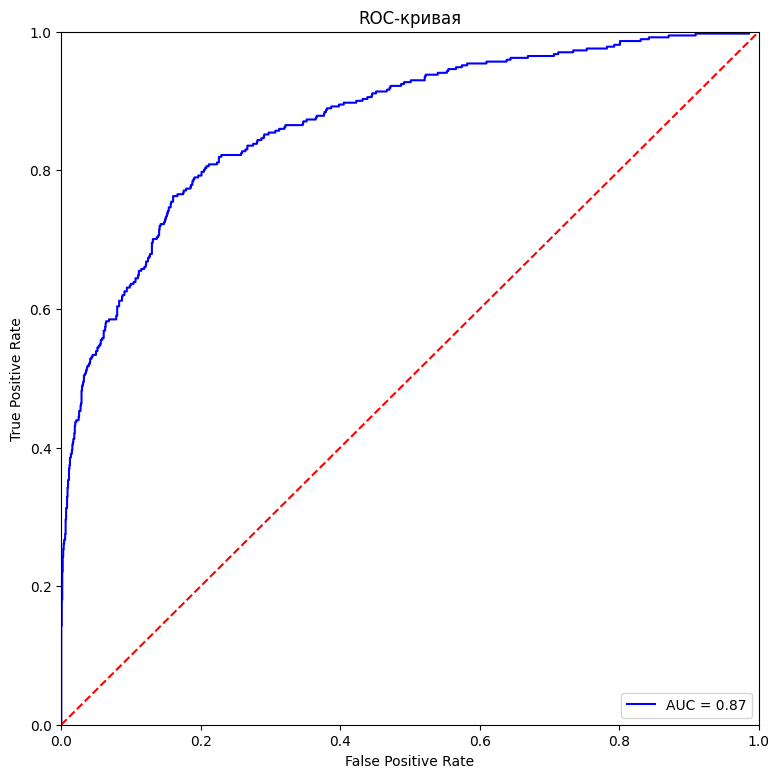

In [103]:
plt.figure(figsize=(9, 9))
plt.title('ROC-кривая')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# вывод графика кривой ROC

Кривая ROC довольно высоко поднята над линией среднего результата

In [104]:
for i in np.arange(0, 1.1, 0.1):
    y_pred = y_proba[:,1] >= i
    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_pred)

    print("Порог = {:.2f} | F1 = {:.3f}, ROC-AUC = {:.3f}".format(i, f1, roc_auc))

Порог = 0.00 | F1 = 0.339, ROC-AUC = 0.500
Порог = 0.10 | F1 = 0.376, ROC-AUC = 0.575
Порог = 0.20 | F1 = 0.429, ROC-AUC = 0.657
Порог = 0.30 | F1 = 0.500, ROC-AUC = 0.732
Порог = 0.40 | F1 = 0.595, ROC-AUC = 0.790
Порог = 0.50 | F1 = 0.628, ROC-AUC = 0.780
Порог = 0.60 | F1 = 0.634, ROC-AUC = 0.758
Порог = 0.70 | F1 = 0.577, ROC-AUC = 0.710
Порог = 0.80 | F1 = 0.430, ROC-AUC = 0.637
Порог = 0.90 | F1 = 0.172, ROC-AUC = 0.547
Порог = 1.00 | F1 = 0.000, ROC-AUC = 0.500


Максимальное значение F1 и ROC-AUC достигается при пороге 0.5, как и в стандартном случае.

## Тестирование модели

In [105]:
best_model.fit(pd.concat([X_train, X_valid]), pd.concat([y_train, y_valid]))

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'class_weight': ('balanced', 'balanced_subsample',
                                          None),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [8], 'n_estimators': range(35, 46)},
             refit='f1', scoring=['f1', 'roc_auc'])

In [106]:
f1_score(y_test, best_model.predict(X_test))

0.6069295101553166

In [107]:
roc_auc_score(y_test, best_model.predict(X_test))

0.7691136394096887

In [108]:
dummy_clf = DummyClassifier()
dummy_clf.fit(pd.concat([X_train, X_valid]), pd.concat([y_train, y_valid]))
f1_score(y_test, dummy_clf.predict(X_test))

0.0

In [109]:
roc_auc_score(y_test, dummy_clf.predict(X_test))

0.5

###### Вывод:

Метрика F1 на тестовых данных для лучшей модели составила 0.609

Метрика ROC-AUC на тестовых данных для лучшей модели составила 0.747

## Общий вывод

Была проведена следующая предобработка данных: удалены лишнии столбцы, проверена корректность типов и значений колонок, удалены строки с пустыми значениями, датасет разделен на предсказывающие колонки и таргет, категориальные признаки преобразованы к числовым с помощью One hot encoding, выборка поделена на обучающую, валидационную и тестовую в соотношении 60:20:20 со стратификацией по таргету, числовые данные обучающего, валидационного и тестового датасетов стандартизированы с помощью StandartScaler, обученного на обучающей выборке.

Во время исследования был определен дисбаланс классов, ушедших пользователей примерно в 4 раза меньше, чем оставшихся в данной выборке. Были исследованы метрики (F1, ROC-AUC) моделей логистической регрессии, дерева решений, случайного леса, обученных на данных без изменений с различными параметрами с помощью GridSearchCV. Лучшие показатели метрик на валидационной выборке показала модель случайного леса, F1 = 0.6343, ROC-AUC = 0.7858. В лучших моделях присутствовало значение параметра class_weight - 'balanced'. То есть классу 1 придавался больший вес, а классу 0 меньший, в соотношении обратном их частоте появления.

Во время борьбы с дисбалансом было опробовано две стратегии: downsampling (Уменьшение выборки), upsampling (Увеличение выборки). Были исследованы метрики (F1, ROC-AUC) моделей логистической регрессии, дерева решений, случайного леса, обученных на уменьшенной и увеличенной выборках с различными параметрами. Лучшие показатели метрик для обеих стратегий на валидационной выборке показала модель случайного леса, (downsampling: F1 = 0.5985, ROC-AUC = 0.7828) и (upsampling: F1 = 0.6303, ROC-AUC = 0.7971). Лучшей моделью стал случайный лес обученный на неизмененной выборке.

Было исследовано влияние порога предсказания на метрики F1 и ROC-AUC для лучшей модели на валидационной выборке. Кривая ROC довольно высоко поднята над линией среднего результата, а площадь по кривой (AUC) составила 0.87. Исследованы показатели метрик F1 и ROC-AUC от порога, самые максимальные значения и F1 и ROC-AUC достигаются при пороге 0.5.

Лучшая модель обучена на совокупности обучающих и валидационных данных, на тесте получены результаты F1 = 0.6055, у наивного классификатора (0),  ROC-AUC = 0.7684, у наивного классификатора всего 0.5.
